# **Aplicação do algoritmo K Nearest Neighbor para classificação do Mnist Dataset**

* O objetivo do problema está em construir um modelo utilizando o algoritmo KNN que seja capaz de classificar corretamente imagens, definindo qual número está contido naquela imagem. 

* Através dos valores da matriz da imagem é que o algoritmo será capaz de prever a variável target. 

* A base de dados utilizada pode ser encontrada no seguinte link: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

* Conceitos e seções teóricas também estão contidas neste arquivo.

# **Carregando e analisando a base de dados** 

In [3]:
# Carregando as bibliotecas a serem utilizadas
import numpy as np
from sklearn import datasets # Base de dados
from sklearn.metrics import confusion_matrix # Matriz de confusão para verificar a multicolinearidade
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # Algoritmo KNN
from sklearn.metrics import classification_report # Métricas de classificação
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Carregando o dataset
dataset = datasets.load_digits()

In [5]:
# Base de dados representando as imagens
dataset.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

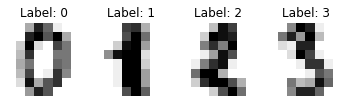

In [6]:
# Visualizando algumas imagens e a label correspondente de cada uma
images_e_labels = list(zip(dataset.images, dataset.target))
for index, (image, label) in enumerate(images_e_labels[:4]):
  plt.subplot(2, 4, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
  plt.title('Label: %i' % label)

In [7]:
# Gerando X e Y
X = dataset.data
y = dataset.target

In [8]:
# Para o X tem-se 1797 linhas e 64 colunas
X.shape

(1797, 64)

In [9]:
# Para o Y tem-se somente 1797 linhas e 1 coluna
y.shape

(1797,)

# **Pré-processamento e Normalização dos dados**

* Para aplicar o algoritmo KNN é interessante normalizar os dados para que o algoritmo performe melhor.

In [10]:
# Dividindo a base de dados em treino e teste
X_treino, testeData, Y_treino, testeLabels = train_test_split(X, y, test_size = 0.3, random_state = 101) # Portanto 30% da base será de teste e 70% de treino

In [11]:
# Dividindo os dados de treino em base de treino e base de validação
treinoData, validData, treinoLabels, validLabels = train_test_split(X_treino, Y_treino, 
                                                                    test_size = 0.1, random_state = 84) # Portanto 10% da base de treino será para validação

**Normalizando as variáveis independentes utilizando a Média de X**

In [12]:
# Média de X
X_mean = np.mean(X, axis = 0)

# Normalizando os dados
X_treino_norm = treinoData - X_mean
X_teste_norm = testeData - X_mean
X_valid_norm = validData - X_mean

# **Procurando o melhor valor de K**

* O valor de K é o que determina quantos vizinhos serão analisados para poder comparar com o novo dado inserido. 

In [17]:
# Range dos valores de K
kVals = range(1, 1000, 2) # Inicia em 1 e vai até o 30, pulando de 2 em 2. Somente os números impares

In [18]:
# Lista vazia para receber as acurácias de cada valor de K
acuracias = []

In [19]:
# Processo de loops de valores de K
for k in kVals:

  # Treinando um modelo KNN com cada valor de K
  modeloKNN = KNeighborsClassifier(n_neighbors = k)
  modeloKNN.fit(treinoData, treinoLabels)

  # Avaliando o modelo e atualizando a lista de acurácias
  score = modeloKNN.score(validData, validLabels)
  print('Com K = %d, a acurácia é %.2f%%' % (k, score * 100))
  acuracias.append(score)

Com K = 1, a acurácia é 99.21%
Com K = 3, a acurácia é 100.00%
Com K = 5, a acurácia é 100.00%
Com K = 7, a acurácia é 99.21%
Com K = 9, a acurácia é 98.41%
Com K = 11, a acurácia é 98.41%
Com K = 13, a acurácia é 97.62%
Com K = 15, a acurácia é 97.62%
Com K = 17, a acurácia é 97.62%
Com K = 19, a acurácia é 97.62%
Com K = 21, a acurácia é 97.62%
Com K = 23, a acurácia é 97.62%
Com K = 25, a acurácia é 96.83%
Com K = 27, a acurácia é 96.83%
Com K = 29, a acurácia é 96.83%
Com K = 31, a acurácia é 96.83%
Com K = 33, a acurácia é 95.24%
Com K = 35, a acurácia é 96.03%
Com K = 37, a acurácia é 96.03%
Com K = 39, a acurácia é 96.03%
Com K = 41, a acurácia é 96.03%
Com K = 43, a acurácia é 95.24%
Com K = 45, a acurácia é 93.65%
Com K = 47, a acurácia é 93.65%
Com K = 49, a acurácia é 93.65%
Com K = 51, a acurácia é 94.44%
Com K = 53, a acurácia é 92.86%
Com K = 55, a acurácia é 92.86%
Com K = 57, a acurácia é 93.65%
Com K = 59, a acurácia é 93.65%
Com K = 61, a acurácia é 93.65%
Com K = 63,

In [20]:
# Obtendo o melhor valor de K dentro da lista
i = np.argmax(acuracias)
print('K = %d obteve o melhor valor de acurácia sendo %.2f%% nos dados de validação.' % (kVals[i], acuracias[i] * 100))

K = 3 obteve o melhor valor de acurácia sendo 100.00% nos dados de validação.


# **Construindo e treinando o modelo KNN** 

In [21]:
# Modelo final
model = KNeighborsClassifier(n_neighbors = kVals[i])

In [22]:
# Treinando o modelo
model.fit(treinoData, treinoLabels)

KNeighborsClassifier(n_neighbors=3)

# **Realizando Previsões com o modelo elaborado**

* Dados de teste serão utilizados

In [23]:
# Realizando as previsões
predictions = model.predict(testeData)

In [24]:
# Performance do modelo nos dados de teste
print('Avaliação do modelo nos dados de Teste:\n')
print(classification_report(testeLabels, predictions))  

Avaliação do modelo nos dados de Teste:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.98      0.96        55
           2       1.00      1.00      1.00        49
           3       0.98      0.98      0.98        54
           4       1.00      0.98      0.99        61
           5       0.98      1.00      0.99        59
           6       1.00      0.98      0.99        46
           7       1.00      1.00      1.00        56
           8       1.00      0.95      0.97        59
           9       0.96      1.00      0.98        48

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [25]:
# Matriz de Confusão do modelo
print('Confusion Matrix: \n')
print(confusion_matrix(testeLabels, predictions))

Confusion Matrix: 

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  1  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  0  1]
 [ 0  0  0  0 60  0  0  0  0  1]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  1  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 48]]


Digito obtido pela previsão: 3


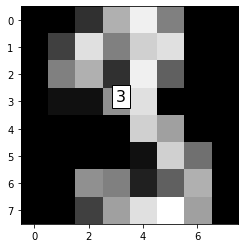

Digito obtido pela previsão: 8


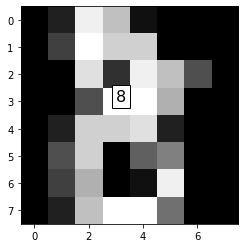

Digito obtido pela previsão: 5


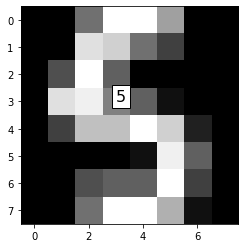

Digito obtido pela previsão: 4


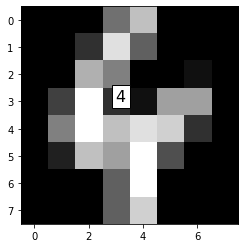

Digito obtido pela previsão: 2


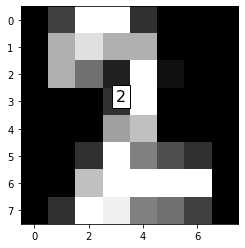

Digito obtido pela previsão: 7


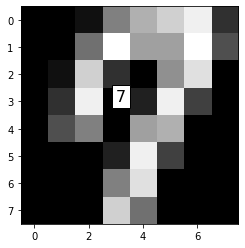

Digito obtido pela previsão: 0


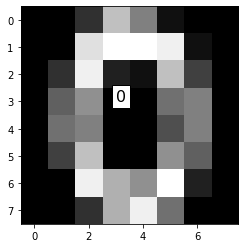

Digito obtido pela previsão: 0


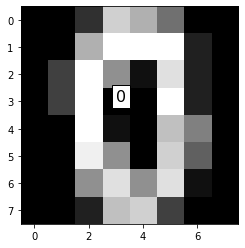

Digito obtido pela previsão: 0


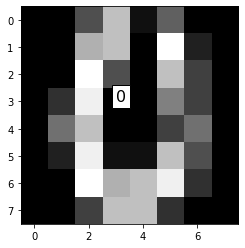

Digito obtido pela previsão: 0


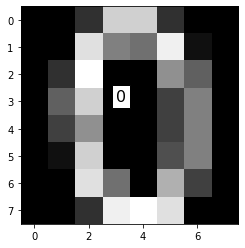

In [32]:
# Realizando previsões com o modelo treinado usando dados de teste
for i in np.random.randint(0, high=len(testeLabels), size = (10,)):

  # Recebe a imagem e faz a previsão
    image = testeData[i]
    prediction = model.predict([image])[0]

  # Mostra as previsões
    imgdata = np.array(image, dtype='float')
    pixels = imgdata.reshape((8,8))
    plt.imshow(pixels,cmap='gray')
    plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
    print("Digito obtido pela previsão: {}".format(prediction))
    plt.show()

# **Realizando Previsões em novos dados no modelo treinado**

In [38]:
# Criando um novo dígito
novoDigito = [0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 14.,
              0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
              6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  5.,
              0.,  0.,  0., 15., 16.,  9.,  9., 14.,  0.,  0.,  0.,  3., 14.,
              9.,  2., 16.,  2.,  0.,  0.,  0.,  7., 15., 16., 11.,  0.]

In [39]:
# Normalizando um novo digito com base na média de X
novoDigito_norm = novoDigito - X_mean

In [40]:
# Realizando a previsão
novaPrevisao = model.predict([novoDigito_norm]) 

Digito obtido na previsão: [6]


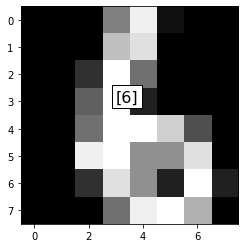

In [41]:
# Previsão do modelo
imgdata = np.array(novoDigito, dtype='float') # Transforma o novo digito em um numpy array
pixels = imgdata.reshape((8,8)) # Transforma o numpy array em uma matriz 8x8
plt.imshow(pixels, cmap='gray') # Exibe a imagem do novo digito
plt.annotate(novaPrevisao,(3,3), bbox={'facecolor':'white'},fontsize=16) # Exibe a nova previsão na posição 3x3 da imagem. 
print("Digito obtido na previsão: {}".format(novaPrevisao)) # Exibe a previsão
plt.show() # Mostra a imagem